<a href="https://colab.research.google.com/github/nehan0306/Camera_Detection/blob/main/Camera_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Camera Detection

In [1]:
# Cloning GitHub repository, installing dependencies, checking PyTorch and GPU
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt comet_ml

import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


In [2]:
# Mounting google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import torch
torch.cuda.empty_cache()

In [10]:
# Training YOLOv5s on DP_camera_final for 20 epochs
!python train.py --img 320 --batch 256 --epochs 20 --data DP_camera_final.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=DP_camera_final.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=256, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hs

In [14]:
# Detecting the camera using the weight file produced after training
!python detect.py --weights /content/yolov5/runs/train/exp4/weights/best.pt --img 640 --conf 0.25 --source data/images

detect: weights=['/content/yolov5/runs/train/exp4/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-193-g485da42 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/2 /content/yolov5/data/images/Test_camera1.jpg: 640x480 1 Camera, 44.8ms
image 2/2 /content/yolov5/data/images/Test_camera2.jpg: 640x480 1 Camera, 8.6ms
Speed: 0.8ms pre-process, 26.7ms inference, 49.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


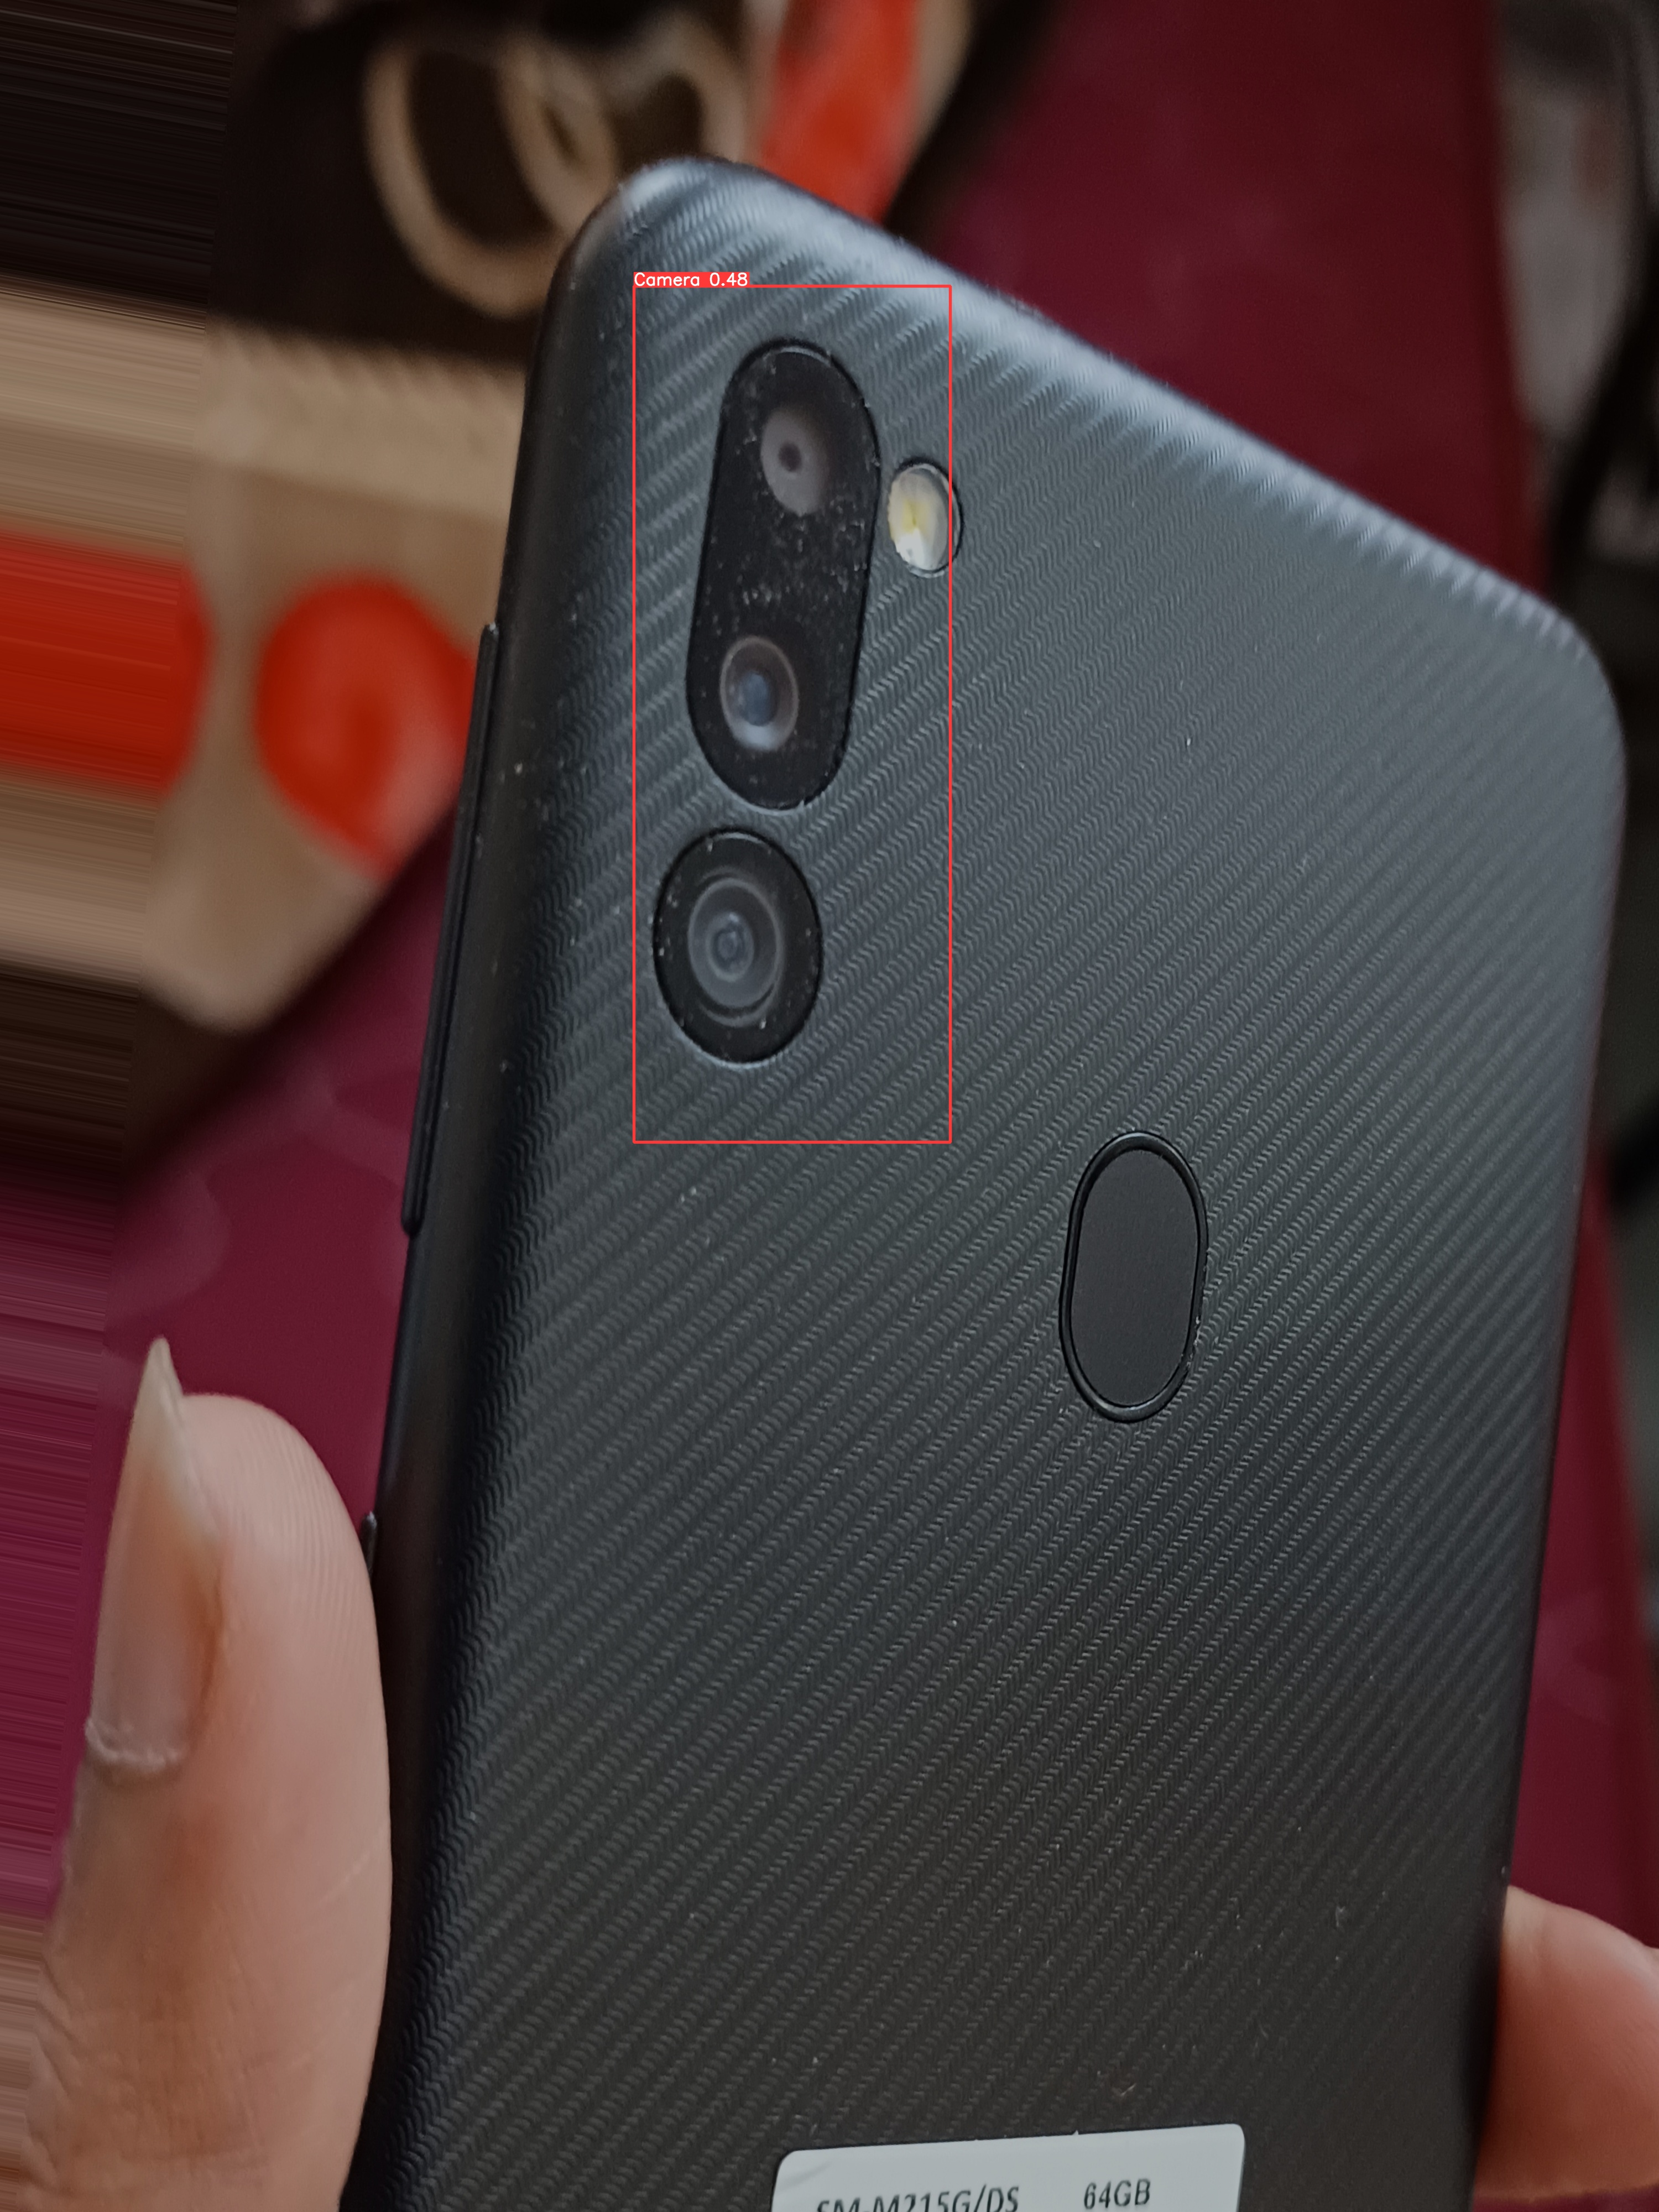

In [20]:
display.Image(filename='runs/detect/exp2/Test_camera2.jpg', width=300)